In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
def avg(x):
    sum=0
    for it in x:
        sum+=it
    return (sum/10)


In [3]:
os.chdir('..')
os.chdir('..')

In [4]:
!pwd

/home/ayush/Ayush/Internship/Medical


In [5]:
df= pd.read_csv('data/heart_statlog_cleveland_hungary_final.csv')

In [6]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [7]:
df.shape

(1190, 12)

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(918, 12)

In [10]:
X = df.iloc[:,:-1].values
Y= df.iloc[:,-1].values

In [11]:
X

array([[40. ,  1. ,  2. , ...,  0. ,  0. ,  1. ],
       [49. ,  0. ,  3. , ...,  0. ,  1. ,  2. ],
       [37. ,  1. ,  2. , ...,  0. ,  0. ,  1. ],
       ...,
       [57. ,  1. ,  4. , ...,  1. ,  1.2,  2. ],
       [57. ,  0. ,  2. , ...,  0. ,  0. ,  2. ],
       [38. ,  1. ,  3. , ...,  0. ,  0. ,  1. ]])

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=32)

In [13]:
X_train.shape

(734, 11)

In [14]:
knn = KNeighborsClassifier()
svc = SVC(kernel='linear',C=1, random_state=42)
dt=DecisionTreeClassifier(random_state=42)

### Cross validation scores without any feature engineering

In [15]:
sum=0
cv_knn_before=cross_val_score(knn, X_train, Y_train, cv=10)
for it in cv_knn_before:
    sum+=it
avg_knn_before =sum/10

In [16]:
sum=0
cv_svc_before=cross_val_score(svc, X_train, Y_train, cv=10)
for it in cv_svc_before:
    sum+=it
avg_svc_before =sum/10
# print(avg_svc_before)

In [17]:
sum=0
cv_dt_before=cross_val_score(dt, X_train, Y_train, cv=10)
for it in cv_dt_before:
    sum+=it
avg_dt_before =sum/10

### Second 

In [18]:
df= pd.read_csv('data/heart_statlog_cleveland_hungary_final.csv')

In [19]:
df=df.drop_duplicates()

In [20]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [21]:
# Replacing all the rows that have 0 value in the resting bp column
df['resting bp s']= df['resting bp s'].replace(0, np.nan)
df['cholesterol']= df['cholesterol'].replace(0, np.nan)

In [22]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,918.000000,918.000000,918.000000,917.000000,746.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.540894,244.635389,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,17.999749,59.153524,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,207.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,237.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [23]:
# There is only one row with 0 value in the required column
df.isna().sum()

age                      0
sex                      0
chest pain type          0
resting bp s             1
cholesterol            172
fasting blood sugar      0
resting ecg              0
max heart rate           0
exercise angina          0
oldpeak                  0
ST slope                 0
target                   0
dtype: int64

### Applying the Iterative Imputer to handle the NaN Values

In [24]:
iti = IterativeImputer()
df=iti.fit_transform(df)
X=df[:,:-1]
Y=df[:,-1]
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=32)
knn = KNeighborsClassifier()
svc = SVC(kernel='linear',C=1, random_state=42)
dt=DecisionTreeClassifier(random_state=42)

### Cross Validation Scores after Iterative Imputation

In [25]:
sum=0
cv_knn_after=cross_val_score(knn, X_train, Y_train, cv=10)
for it in cv_knn_after:
    sum+=it
avg_knn_after =sum/10

sum=0
cv_svc_after=cross_val_score(svc, X_train, Y_train, cv=10)
for it in cv_svc_after:
    sum+=it
avg_svc_after =sum/10

sum=0
cv_dt_after=cross_val_score(dt, X_train, Y_train, cv=10)
for it in cv_dt_after:
    sum+=it
avg_dt_after =sum/10

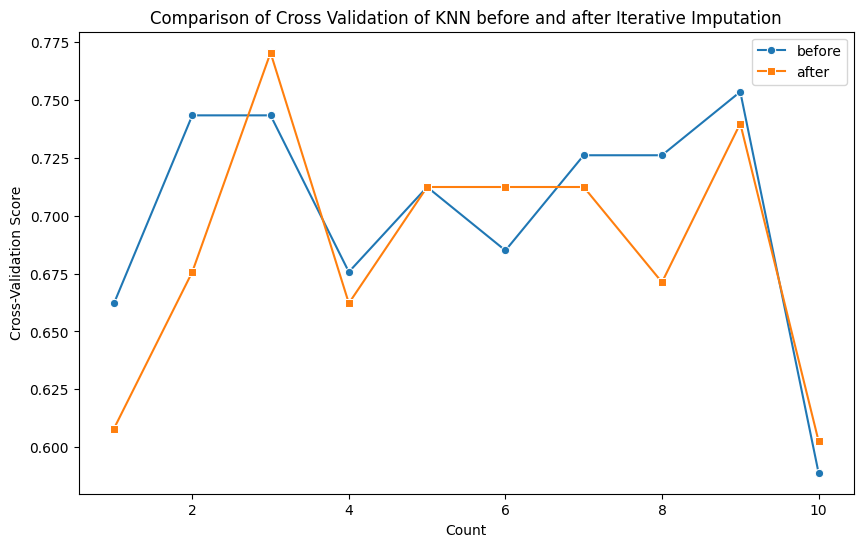

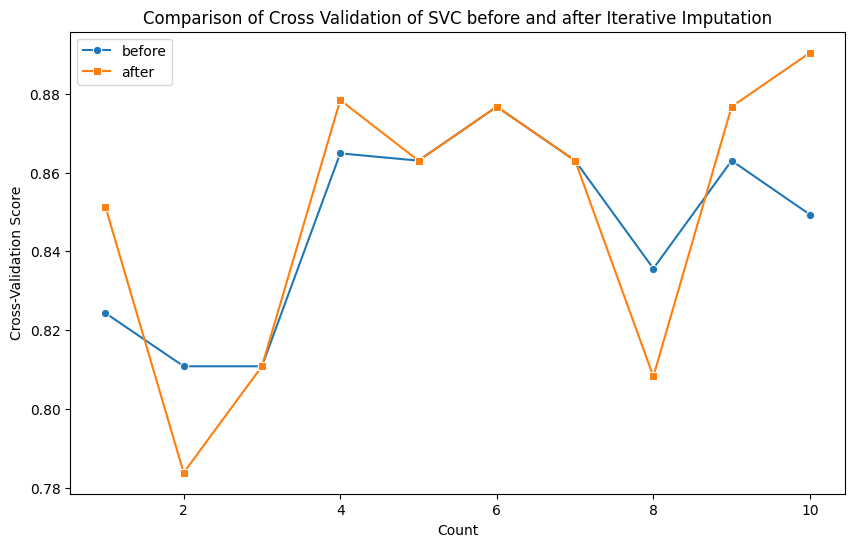

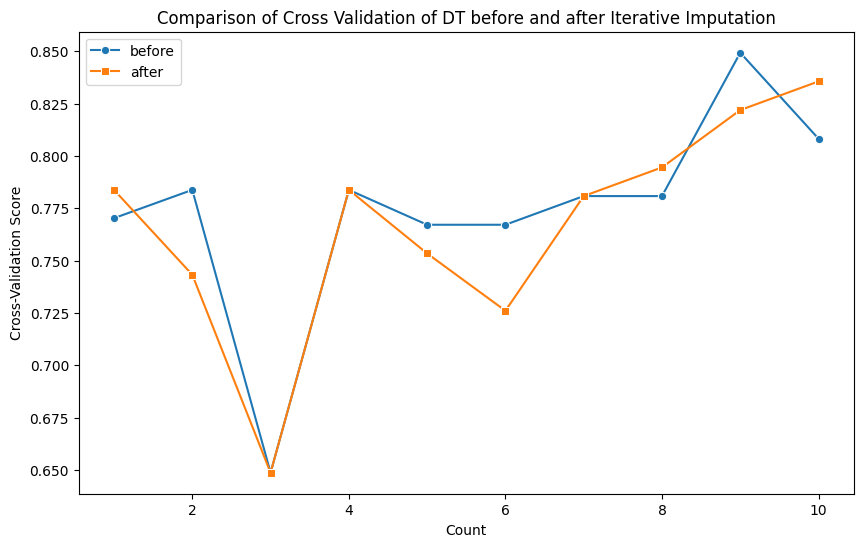

In [26]:
def plot(cv_before, cv_after, label1, label2, model):
    x = np.array([1, 2, 3, 4, 5,6,7,8,9,10])

    plt.figure(figsize=(10, 6))

    sns.lineplot(x=x, y=cv_before, label=label1, marker='o')
    sns.lineplot(x=x, y=cv_after, label=label2, marker='s')

    plt.title(f'Comparison of Cross Validation of {model} before and after Iterative Imputation')
    plt.xlabel('Count')
    plt.ylabel('Cross-Validation Score')
    plt.legend()
    plt.show()

plot(cv_knn_before, cv_knn_after, "before", "after","KNN")
plot(cv_svc_before, cv_svc_after, "before", "after","SVC")
plot(cv_dt_before, cv_dt_after, "before", "after","DT")

/tmp/ipykernel_8415/3447092.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


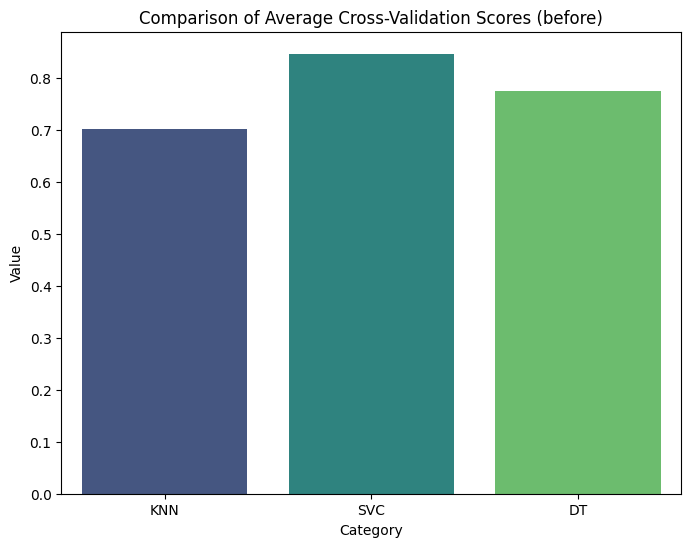

/tmp/ipykernel_8415/3447092.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


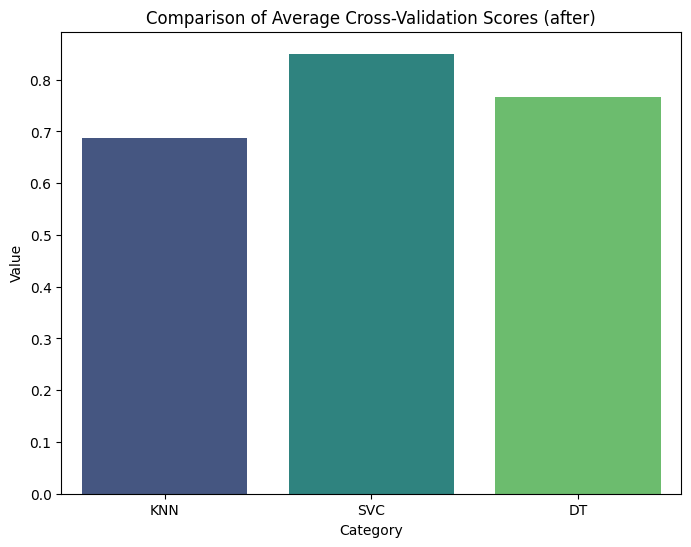

In [27]:
def avg_plot(avg_knn, avg_svc, avg_dt,status):
    data = {
        'Category': ['KNN', 'SVC', 'DT'],
        'Value': [avg_knn, avg_svc, avg_dt] 
        }

    df = pd.DataFrame(data)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Category', y='Value', data=df, palette='viridis')

    plt.title(f'Comparison of Average Cross-Validation Scores ({status})')
    plt.xlabel('Category')
    plt.ylabel('Value')
    plt.show()

avg_plot(avg_knn_before, avg_svc_before, avg_dt_before,'before')
avg_plot(avg_knn_after, avg_svc_after, avg_dt_after,'after')

/tmp/ipykernel_8415/159987225.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


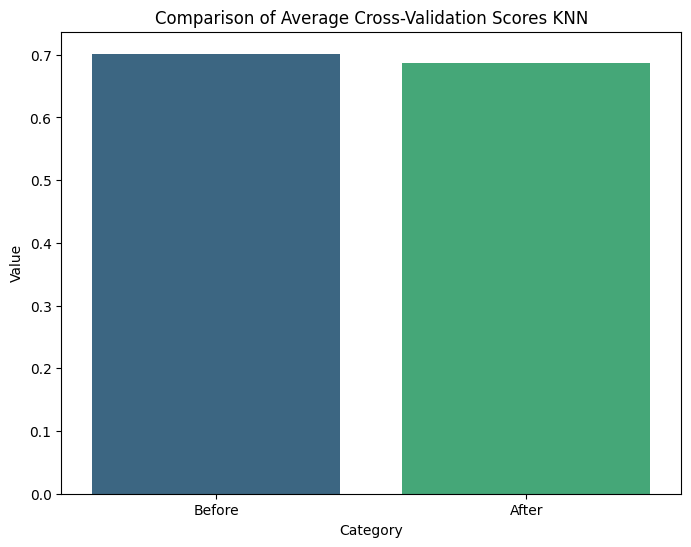

/tmp/ipykernel_8415/159987225.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


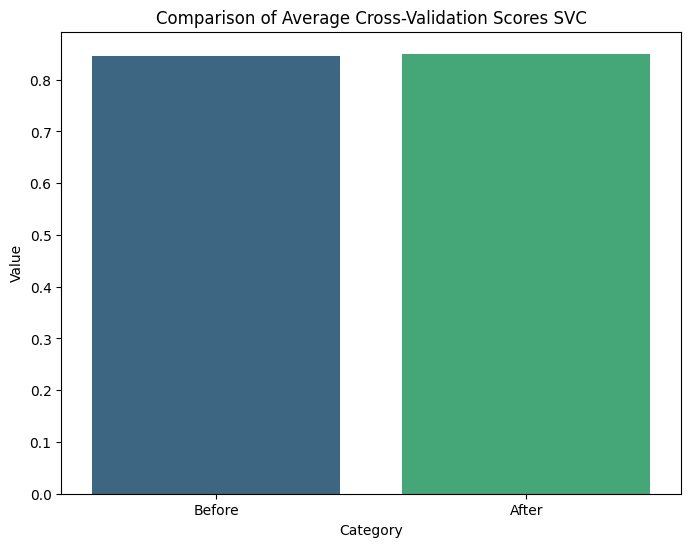

/tmp/ipykernel_8415/159987225.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


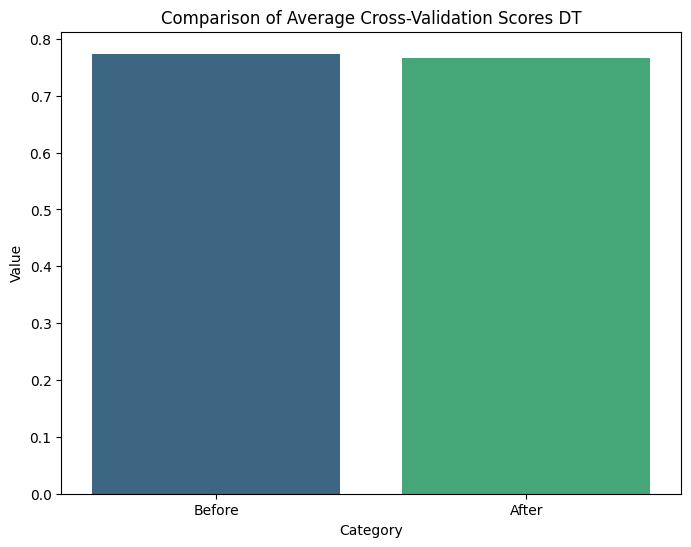

In [28]:
def avg_plot_model(avg_before, avg_after, model):
    data = {
        'Category': ['Before', 'After'],
        'Value': [avg_before, avg_after] 
        }

    df = pd.DataFrame(data)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Category', y='Value', data=df, palette='viridis')

    plt.title(f'Comparison of Average Cross-Validation Scores {model}')
    plt.xlabel('Category')
    plt.ylabel('Value')
    plt.show()

avg_plot_model(avg_knn_before, avg_knn_after, 'KNN')
avg_plot_model(avg_svc_before, avg_svc_after, 'SVC')
avg_plot_model(avg_dt_before, avg_dt_after, 'DT')

### Without removing the duplicates

In [29]:
df= pd.read_csv('data/heart_statlog_cleveland_hungary_final.csv')
df=df.drop_duplicates()
# Replacing all the rows that have 0 value in the resting bp column
df['resting bp s']= df['resting bp s'].replace(0, np.nan)
df['cholesterol']= df['cholesterol'].replace(0, np.nan)

# There is only one row with 0 value in the required column
df.isna().sum()


age                      0
sex                      0
chest pain type          0
resting bp s             1
cholesterol            172
fasting blood sugar      0
resting ecg              0
max heart rate           0
exercise angina          0
oldpeak                  0
ST slope                 0
target                   0
dtype: int64

In [30]:
iti = IterativeImputer()
df=iti.fit_transform(df)
X=df[:,:-1]
Y=df[:,-1]
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=32)
knn = KNeighborsClassifier()
svc = SVC(kernel='linear',C=1, random_state=42)
dt=DecisionTreeClassifier(random_state=42)

In [31]:
sum=0
cv_knn_after_dup=cross_val_score(knn, X_train, Y_train, cv=10)
for it in cv_knn_after_dup:
    sum+=it
avg_knn_after_dup =sum/10

sum=0
cv_svc_after_dup=cross_val_score(svc, X_train, Y_train, cv=10)
for it in cv_svc_after_dup:
    sum+=it
avg_svc_after_dup =sum/10

sum=0
cv_dt_after_dup=cross_val_score(dt, X_train, Y_train, cv=10)
for it in cv_dt_after_dup:
    sum+=it
avg_dt_after_dup =sum/10

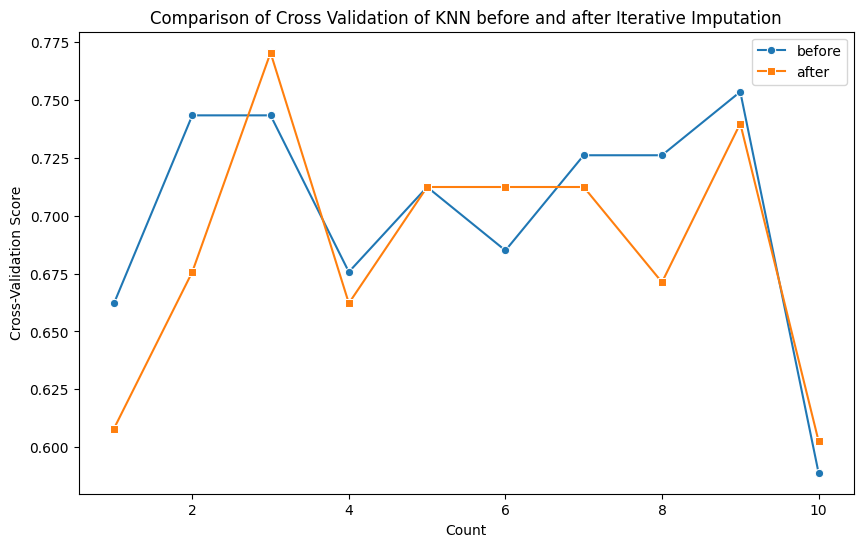

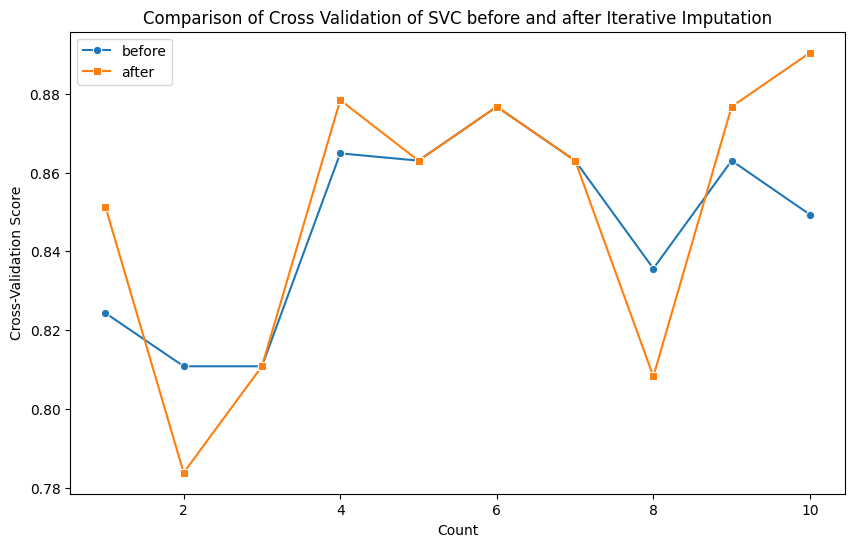

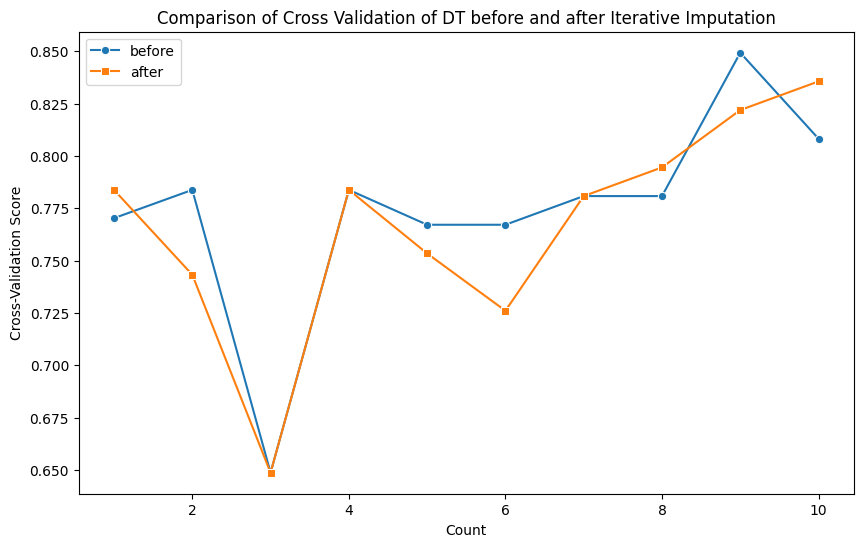

In [32]:
def plot(cv_before, cv_after, label1, label2, model):
    x = np.array([1, 2, 3, 4, 5,6,7,8,9,10])

    plt.figure(figsize=(10, 6))

    sns.lineplot(x=x, y=cv_before, label=label1, marker='o')
    sns.lineplot(x=x, y=cv_after, label=label2, marker='s')

    plt.title(f'Comparison of Cross Validation of {model} before and after Iterative Imputation')
    plt.xlabel('Count')
    plt.ylabel('Cross-Validation Score')
    plt.legend()
    plt.show()

plot(cv_knn_before, cv_knn_after, "before", "after","KNN")
plot(cv_svc_before, cv_svc_after, "before", "after","SVC")
plot(cv_dt_before, cv_dt_after, "before", "after","DT")

/tmp/ipykernel_8415/3447092.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


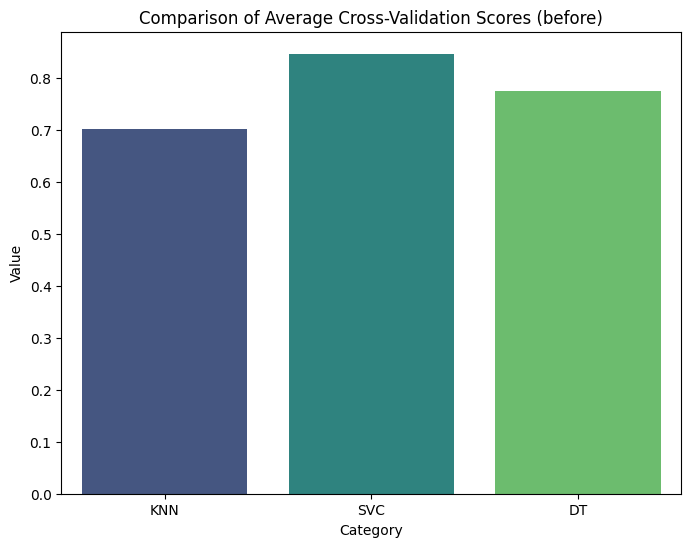

/tmp/ipykernel_8415/3447092.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


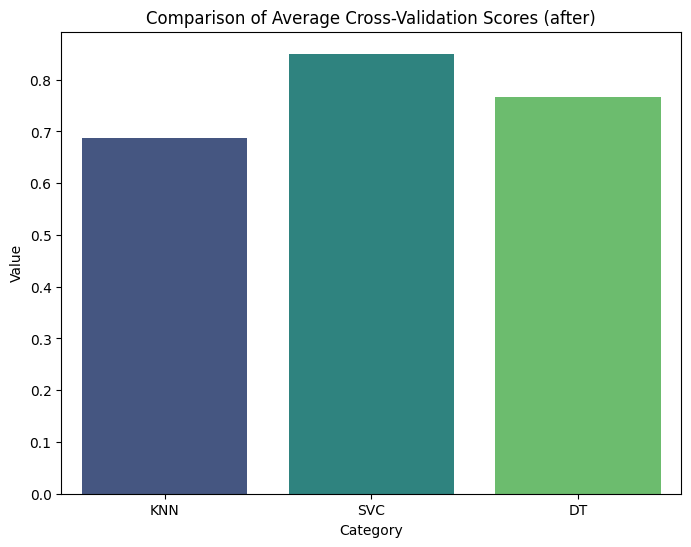

In [33]:
def avg_plot(avg_knn, avg_svc, avg_dt,status):
    data = {
        'Category': ['KNN', 'SVC', 'DT'],
        'Value': [avg_knn, avg_svc, avg_dt] 
        }

    df = pd.DataFrame(data)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Category', y='Value', data=df, palette='viridis')

    plt.title(f'Comparison of Average Cross-Validation Scores ({status})')
    plt.xlabel('Category')
    plt.ylabel('Value')
    plt.show()

avg_plot(avg_knn_before, avg_svc_before, avg_dt_before,'before')
avg_plot(avg_knn_after, avg_svc_after, avg_dt_after,'after')

/tmp/ipykernel_8415/159987225.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


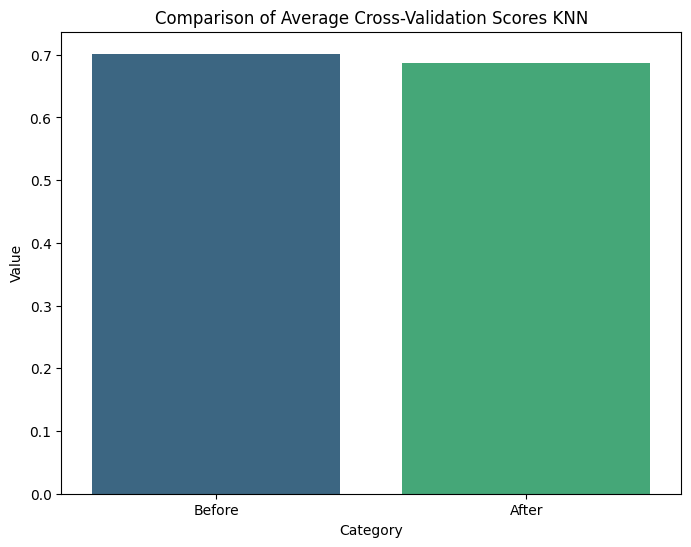

/tmp/ipykernel_8415/159987225.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


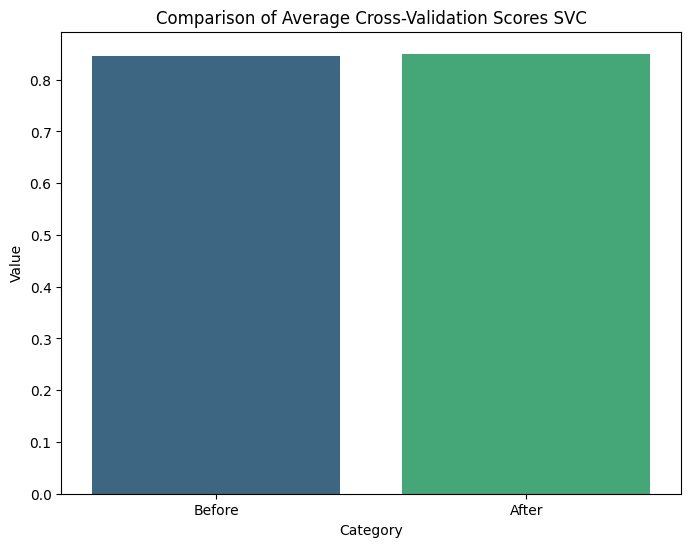

/tmp/ipykernel_8415/159987225.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


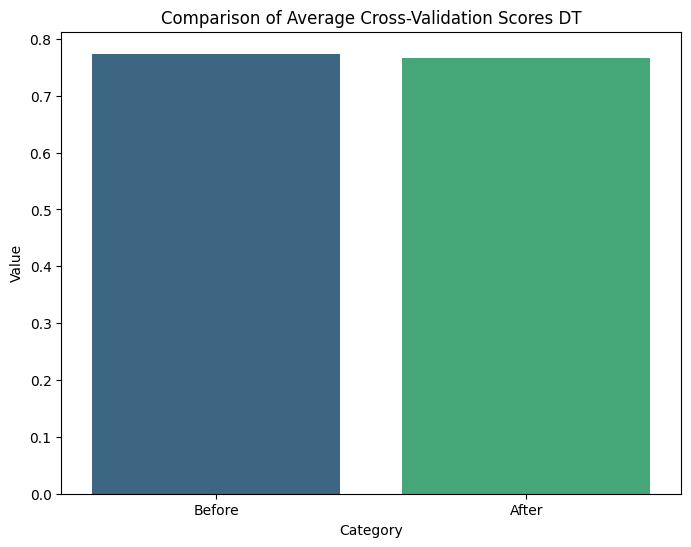

In [34]:
def avg_plot_model(avg_before, avg_after, model):
    data = {
        'Category': ['Before', 'After'],
        'Value': [avg_before, avg_after] 
        }

    df = pd.DataFrame(data)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Category', y='Value', data=df, palette='viridis')

    plt.title(f'Comparison of Average Cross-Validation Scores {model}')
    plt.xlabel('Category')
    plt.ylabel('Value')
    plt.show()

avg_plot_model(avg_knn_before, avg_knn_after, 'KNN')
avg_plot_model(avg_svc_before, avg_svc_after, 'SVC')
avg_plot_model(avg_dt_before, avg_dt_after, 'DT')

### Comparison with and without duplicates

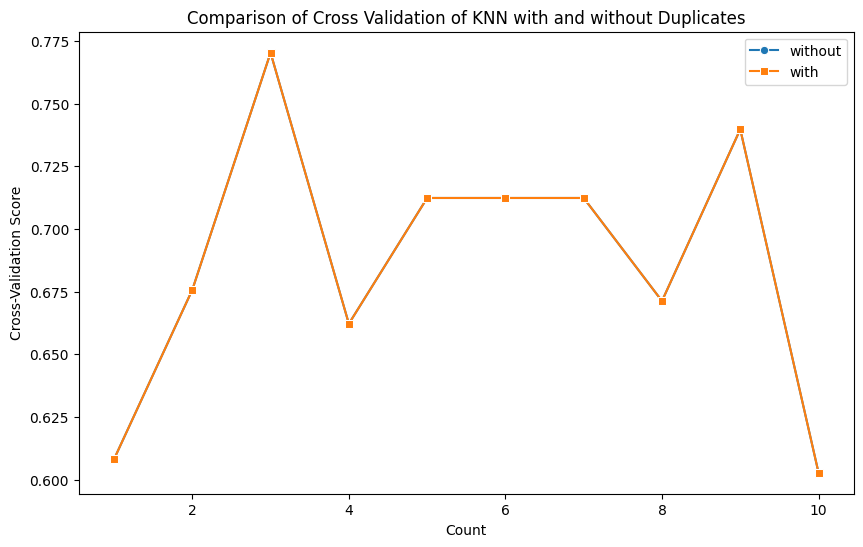

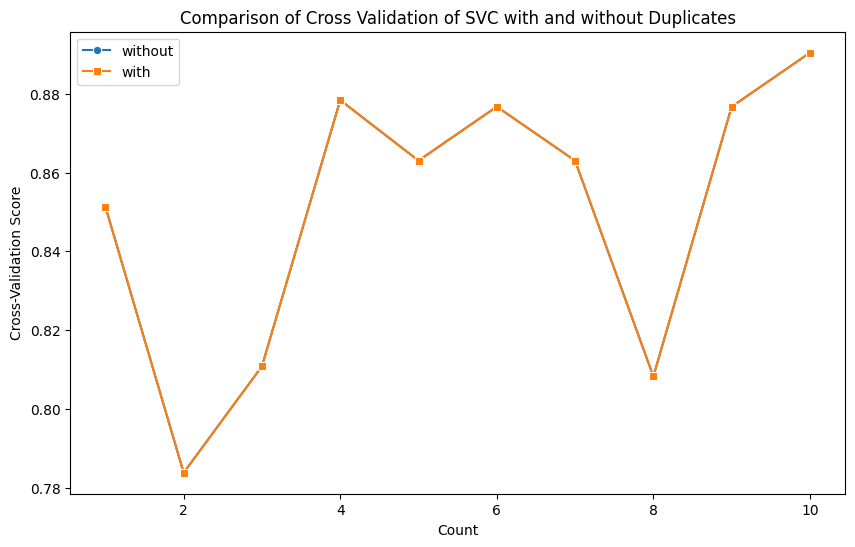

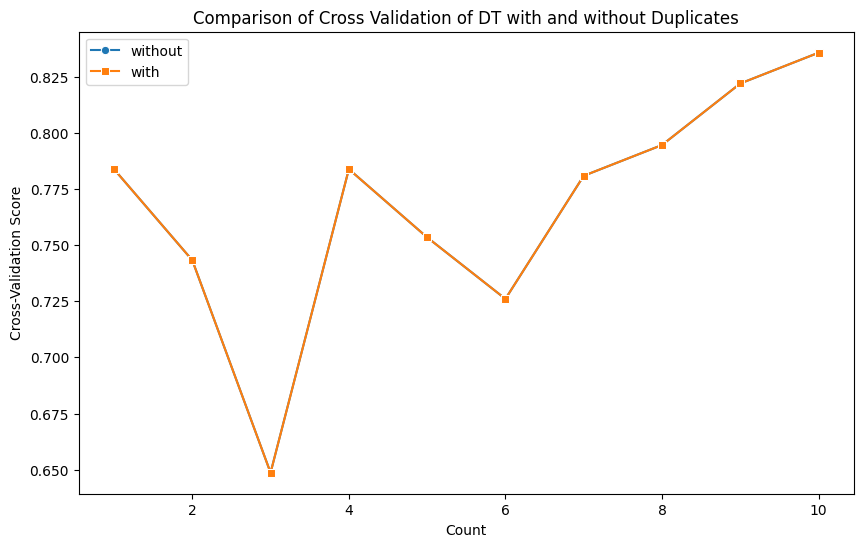

In [35]:
def plot(cv_before, cv_after, label1, label2, model):
    x = np.array([1, 2, 3, 4, 5,6,7,8,9,10])

    plt.figure(figsize=(10, 6))

    sns.lineplot(x=x, y=cv_before, label=label1, marker='o')
    sns.lineplot(x=x, y=cv_after, label=label2, marker='s')

    plt.title(f'Comparison of Cross Validation of {model} with and without Duplicates')
    plt.xlabel('Count')
    plt.ylabel('Cross-Validation Score')
    plt.legend()
    plt.show()

plot(cv_knn_after, cv_knn_after_dup, "without", "with","KNN")
plot(cv_svc_after, cv_svc_after_dup, "without", "with","SVC")
plot(cv_dt_after, cv_dt_after_dup, "without", "with","DT")

/tmp/ipykernel_8415/2774746512.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


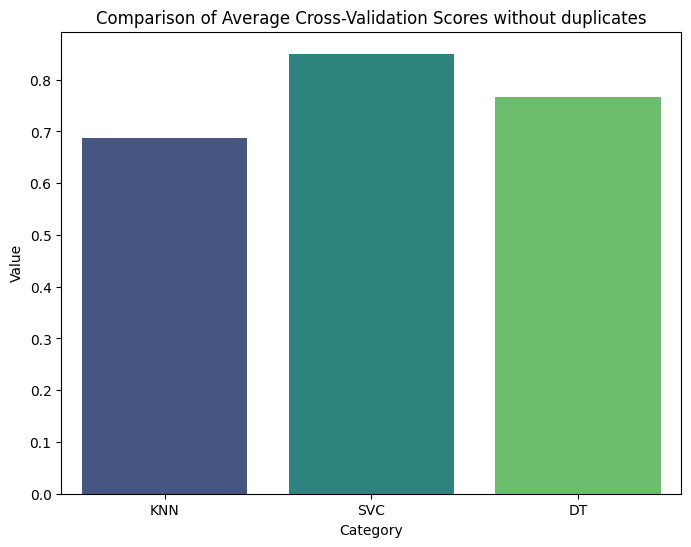

/tmp/ipykernel_8415/2774746512.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


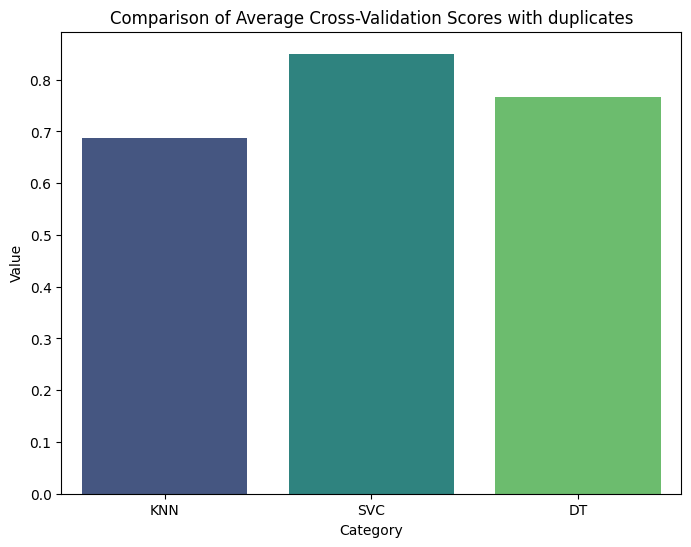

In [36]:
def avg_plot(avg_knn, avg_svc, avg_dt,status):
    data = {
        'Category': ['KNN', 'SVC', 'DT'],
        'Value': [avg_knn, avg_svc, avg_dt] 
        }

    df = pd.DataFrame(data)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Category', y='Value', data=df, palette='viridis')

    plt.title(f'Comparison of Average Cross-Validation Scores {status} duplicates')
    plt.xlabel('Category')
    plt.ylabel('Value')
    plt.show()

avg_plot(avg_knn_after, avg_svc_after, avg_dt_after,'without')
avg_plot(avg_knn_after_dup, avg_svc_after_dup, avg_dt_after_dup,'with')

/tmp/ipykernel_8415/692302249.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


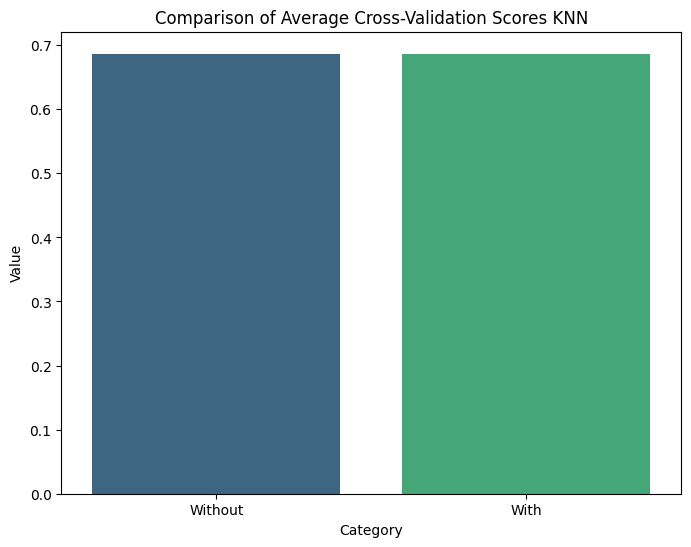

/tmp/ipykernel_8415/692302249.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


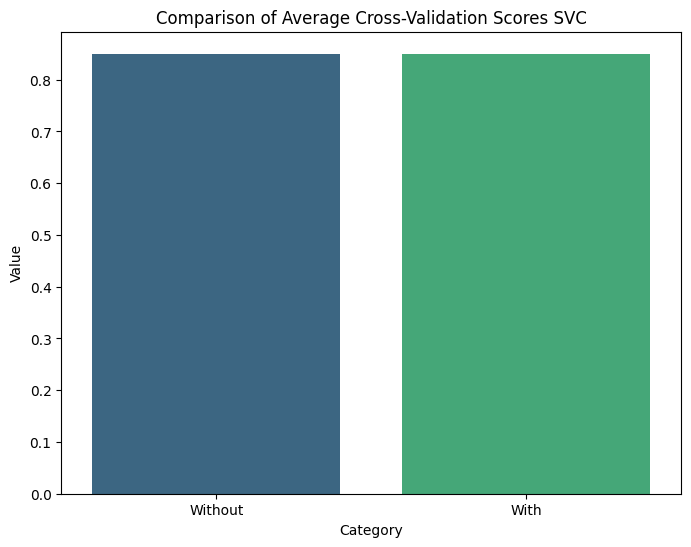

/tmp/ipykernel_8415/692302249.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Value', data=df, palette='viridis')


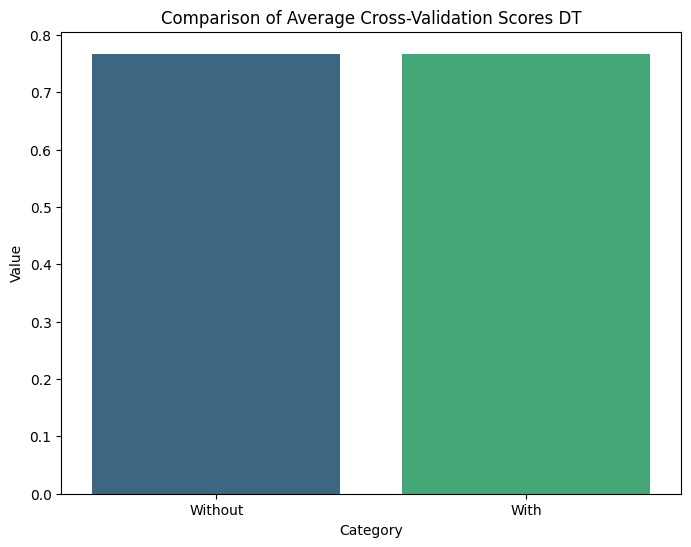

In [37]:
def avg_plot_model(avg_before, avg_after, model):
    data = {
        'Category': ['Without', 'With'],
        'Value': [avg_before, avg_after] 
        }

    df = pd.DataFrame(data)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Category', y='Value', data=df, palette='viridis')

    plt.title(f'Comparison of Average Cross-Validation Scores {model}')
    plt.xlabel('Category')
    plt.ylabel('Value')
    plt.show()

avg_plot_model(avg_knn_after, avg_knn_after_dup, 'KNN')
avg_plot_model(avg_svc_after, avg_svc_after_dup, 'SVC')
avg_plot_model(avg_dt_after, avg_dt_after_dup, 'DT')

## Mutual Information

In [38]:
X_train.shape

(734, 11)

In [39]:
from sklearn.feature_selection import mutual_info_classif
discrete_vars=[False, True, True, False, False, True, True, False, True, False, True]
mi =mutual_info_classif(X_train, Y_train, discrete_features=discrete_vars)

In [40]:
mi

array([0.02979529, 0.04271295, 0.15755349, 0.04117399, 0.07069721,
       0.04038697, 0.00370734, 0.08440538, 0.13425297, 0.09917678,
       0.21100683])

In [41]:
mi= pd.Series(mi, name="MI")
mi= mi.sort_values(ascending=False)
mi


10    0.211007
2     0.157553
8     0.134253
9     0.099177
7     0.084405
4     0.070697
1     0.042713
3     0.041174
5     0.040387
0     0.029795
6     0.003707
Name: MI, dtype: float64

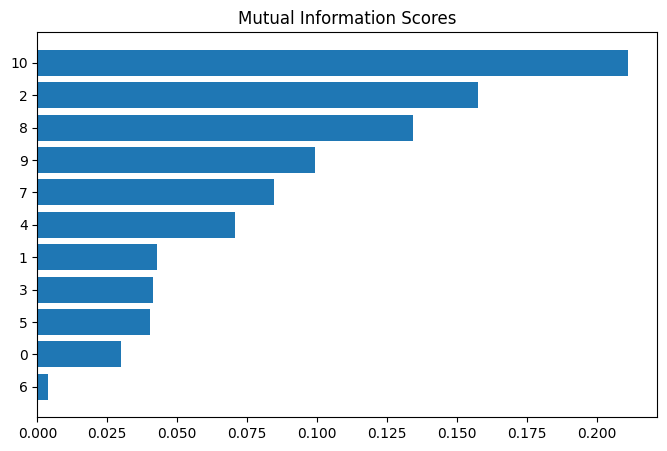

In [42]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi)

In [43]:
# df.corr()

### Checking the variance ratio and removing the column with the smallest variance

In [ ]:
from sklearn.preprocessing import StandardScaler

In [44]:
from sklearn.decomposition import PCA
pca =PCA()
X_train=pca.fit_transform(X_train)
pca.explained_variance_ratio_.tolist()

[0.7311151410769832,
 0.1697684098709187,
 0.08024433910433505,
 0.018017444508240645,
 0.0003348275995526241,
 0.0001798922334794685,
 0.00015688606720571142,
 6.164543947424275e-05,
 4.5233249625158054e-05,
 4.1934770453182984e-05,
 3.424607973196655e-05]

In [45]:
df.shape

(918, 12)

In [46]:
def cv(limit):
    X=df[:,:limit]
    Y=df[:,-1]

    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=32)
    knn = KNeighborsClassifier()
    svc = SVC(kernel='linear',C=1, random_state=42)
    dt=DecisionTreeClassifier(random_state=42)
    pc=[]

    pc.append(avg(cross_val_score(knn, X_train, Y_train, cv=10)))
    pc.append(avg(cross_val_score(svc, X_train, Y_train, cv=10)))
    pc.append(avg(cross_val_score(dt, X_train, Y_train, cv=10)))

    return pc

In [47]:
cv(-1) #This is the original without any columns removed

[0.6866901147723066, 0.8502406516105147, 0.7671788226582746]

In [48]:
for i in range(-1, -12, -1):
    print(f"Cross Validation Score for {(-i)-1} columns removed")
    print(cv(i))

Cross Validation Score for 0 columns removed
[0.6866901147723066, 0.8502406516105147, 0.7671788226582746]
Cross Validation Score for 1 columns removed
[0.6853202517586079, 0.8202332469455758, 0.7522028878193262]
Cross Validation Score for 2 columns removed
[0.6853202517586079, 0.7916697519437246, 0.7562939651980747]
Cross Validation Score for 3 columns removed
[0.682599037393558, 0.7780821917808218, 0.7140133283968899]
Cross Validation Score for 4 columns removed
[0.6076082932247315, 0.7916512402813772, 0.6976490188818956]
Cross Validation Score for 5 columns removed
[0.6062754535357275, 0.7889115142539801, 0.7002961865975564]
Cross Validation Score for 6 columns removed
[0.6062939651980747, 0.7875416512402814, 0.7031284709366901]
Cross Validation Score for 7 columns removed
[0.6565346168085895, 0.7767308404294705, 0.7014994446501296]
Cross Validation Score for 8 columns removed
[0.7330988522769345, 0.7588670862643465, 0.7479822288041467]
Cross Validation Score for 9 columns removed
[0

In [49]:
from sklearn.metrics import confusion_matrix, f1_score
X=df[:,:-9]
Y=df[:,-1]

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=32)
knn = KNeighborsClassifier()
svc = SVC(kernel='linear',C=1, random_state=42)
dt=DecisionTreeClassifier(random_state=42)
pc1=[]

knn.fit(X_train, Y_train)
svc.fit(X_train, Y_train)
dt.fit(X_train, Y_train)

Y_pred=knn.predict(X_test)
cf=confusion_matrix(Y_test, Y_pred)
score = f1_score(Y_test, Y_pred)
print(f"F1 Score of KNN: {score}")
print(cf)


Y_pred=svc.predict(X_test)
cf=confusion_matrix(Y_test, Y_pred)
score = f1_score(Y_test, Y_pred)
print(f"F1 Score of SVC: {score}")
print(cf)


Y_pred=dt.predict(X_test)
cf=confusion_matrix(Y_test, Y_pred)
score = f1_score(Y_test, Y_pred)
print(f"F1 Score of DT: {score}")
print(cf)



F1 Score of KNN: 0.801762114537445
[[48 26]
 [19 91]]
F1 Score of SVC: 0.7924528301886793
[[56 18]
 [26 84]]
F1 Score of DT: 0.7641509433962265
[[53 21]
 [29 81]]


In [52]:
from sklearn.metrics import confusion_matrix, f1_score
X=df[:,:-1]
Y=df[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=32)
knn = KNeighborsClassifier()
svc = SVC(kernel='linear',C=1, random_state=42)
dt=DecisionTreeClassifier(random_state=42)
pc1=[]

knn.fit(X_train, Y_train)
svc.fit(X_train, Y_train)
dt.fit(X_train, Y_train)

Y_pred=knn.predict(X_test)
cf=confusion_matrix(Y_test, Y_pred)
score = f1_score(Y_test, Y_pred)
print(f"F1 Score of KNN: {score}")
print(cf)


Y_pred=svc.predict(X_test)
cf=confusion_matrix(Y_test, Y_pred)
score = f1_score(Y_test, Y_pred)
print(f"F1 Score of SVC: {score}")
print(cf)


Y_pred=dt.predict(X_test)
cf=confusion_matrix(Y_test, Y_pred)
score = f1_score(Y_test, Y_pred)
print(f"F1 Score of DT: {score}")
print(cf)

F1 Score of KNN: 0.728110599078341
[[46 28]
 [31 79]]
F1 Score of SVC: 0.8727272727272727
[[60 14]
 [14 96]]
F1 Score of DT: 0.8075117370892019
[[57 17]
 [24 86]]
